In [263]:
# Initialize Otter
import otter
grader = otter.Notebook("hw06.ipynb")

# Homework 6: Probability Distributions



## Due Date: Thursday February 20th by 11:59 PM MT on Gradescope

## Assignment Learning Objectives
 - Explain the difference between Probabilty Density Functions (PDFs) and Cumulative Density Functions (CDFs) and use both to calculate probabilities for continuous random variables
 - State the Probability Mass Functions, Expected Value and Variance for Bernoulli, Binomial and Poisson RV and use them to calculate probabilities
 - Distinguish when to use Bernoulli vs Binomial vs Poission Random Variables to model a given situation and state any assumptions that are needed to use these RV
 - Use Python to simulate sampling from a Bernoulli, Binomial or Poisson Distribution
 - State the PDF, Expected Value and Variance for a Uniform continuous random variable and use it to calculate probabilities
 - State the PDF, Expected Value and Variance for an Exponential continuous random variable and use it to calculate probabilities
 - State the PDF, Expected Value and Variance for Normal continuous random variable and use it to calculate probabilities
 - Distinguish when to use Uniform vs Exponential vs  Normal random variables to model a given situation and state any assumptions that are needed to use these RV



## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Below are examples of acceptable vs unacceptable use of resources and collaboration when doing HW assignments in CSCI 3022.


The following would be some **examples of cheating** when working on HW assignments in CSCI 3022.  Any of these constitute a **violation of the course's collaboration policy and will result in an F in the course and a trip to the honor council**.   


 - Consulting web pages that may have a solution to a given homework problem or one similar is cheating.  However, consulting the class notes, and web pages that explain the material taught in class but do NOT show a solution to the homework problem in question are permissible to view.  Clearly, there's a fuzzy line here between a valid use of resources and cheating. To avoid this line, one should merely consult the course notes, the course textbook, and references that contain syntax and/or formulas.
 - Copying a segment of code or math solution of three lines or more from another student from a printout, handwritten copy, or by looking at their computer screen 
 - Allowing another student to copy a segment of your code or math solution of three lines or more
 - Taking a copy of another student's work (or a solution found online) and then editing that copy
 - Reading someone else’s solution to a problem on the HW before writing your own.
 - Asking someone to write all or part of a program or solution for you.
 - Asking someone else for the code necessary to fix the error for you, other than for simple syntactical errors
 


On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor or teaching assistant rather than another student as this situation can easily
lead to a, possibly inadvertent, cheating situation.

We are here to help!  Visit HW Hours and/or post questions on Piazza!


If while completing this assignment you reference any websites other than those linked in this assignment or provided on Canvas please list those references here:

**External references**:  *list any websites you referenced

#### Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.


### Score breakdown

Question | Points | Grading Type
--- | --- | ---
Question 1adf | 10 | manual
Question 1bce | 4 | auto
Question 2 | 7 | manual
Question 3 | 9 | manual
Question 4 | 8 | manual
Question 5a | 4 | manual
Question 5b | 2 | auto
Question 6a | 2 | manual
Question 6b | 1 | auto
Question 6c | 3 | manual and auto
|Total | 50



## Assigned Readings for this HW:

- [Random Variables](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/rvs/)
- [Probability Mass Functions](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/pmf/)
- [Expected Value](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/expectation/)
- [Variance](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/variance/)
- [Bernoulli Distribution](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/bernoulli/)
- [Binomial Distribution](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/binomial/)
- [Poisson Distribution](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/poisson/)
- [Continuous Random Variables](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/continuous/)
- [Probability Density](https://data88s.org/textbook/content/Chapter_10/01_Density.html)
- [Continuous Uniform Distribution](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/uniform/)
- [Exponential Distribution](https://www.probabilitycourse.com/chapter4/4_2_2_exponential.php)
- [Normal Distribution](https://onlinestatbook.com/2/normal_distribution/normal_distribution.html)

<a id='top'></a>
---
**Shortcuts:**  [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Problem 6](#p6) |
---
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

In [264]:
import numpy as np
import pandas as pd
import math
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import hashlib
from IPython.display import display, Latex, Markdown
import simple_latex_checker as slc

plt.style.use('fivethirtyeight')
# Default plot configurations
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()
import warnings
warnings.simplefilter('ignore', FutureWarning)


def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

%matplotlib inline

<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 1  ##

In the general population, approximately $10\%$ of people are left-handed.  You randomly sample (with replacement) $77$ people from the general population.  


### <span style='color:Red'>  Question 1a (3 pts)  ##
Answer each of the following questions using Markdown in the same cell below.



 - **i).**  Let $X$ be the random variable that is the number of people in your sample who are left handed.   Define how $X$ is distributed using the notation: $X\sim DistributionNickName(parameter\_values)$.  

 
 - **ii).** What is the support of $X$?

 -  **iii).**  What is the PMF of $X$? (Give your answer as a closed-form function)


Answer all of the questions above in the same LaTeX cell below. 





### Answer

**i)** For this we can use the bionomial distribution where $n$ = the number of people ($77$), and $p$ = the amount of people that are actually left-handed.

$X \sim \text{Bin}(77, 0.1)$

**ii)** The support means the possible number of successes. It is represented as $k \in \{0, 1,... n\}$.

In this instance, the support of $X$ would be $k=77$, because there is a possibillity (albeit low) that all the people we sample are left handed.

**iii)** The PMF of the binomial distribution can be represented by the following formula:

$$
P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}
$$

Where:

$n$ = number of trials

$p$ = probability of success in each trial

$k$ = probability of getting $k$ successes in each trial

<!-- END QUESTION -->

### <span style='color:Red'>  Question 1b (2 pts)  ##
Calculate the following in the code cell below. 

For all parts of this question do NOT use any built-in PMF or CDF methods in Python (i.e. do not use Scipy).   
Also, **do NOT use the math.factorial** method (it will fail in gradescope).  
You can use either `special.comb` or `special.factorial` as needed.  

 - **i).**  What is the probability $9$ people in your sample are left-handed?  



 - **ii).**  What is the probability that **at least** $7$ people and **at most** $10$ people in your sample are left-handed?  

 - **iii).**  What is $E[X]$?   (you can use the formula we derived in class)
 
 - **iv).**  What is $SD[X]$?    (you can use the formula we derived in class)


In [265]:
#i).
n = 77 # amount of people sampled
k9 = 9 # they are indeed left-handed
p = 0.1 # probability they are left handed

prob_9 = special.comb(n, k9) * pow(p, k9)* pow(1-p, n-k9)
print("Prob of exactly 9 left-handed people = ", round(prob_9,3))

#ii).
prob_7_to_10 = (special.comb(n, 7) * pow(p, 7) * pow(1-p, n-7)) \
                + (special.comb(n, 8) * pow(p, 8) * pow(1-p, n-8)) \
                + (special.comb(n, 9) * pow(p, 9) * pow(1-p, n-9)) \
                + (special.comb(n, 10) * pow(p, 10) * pow(1-p, n-10))
print("Prob of between 7 and 10 left-handed people = ", round(prob_7_to_10,3))

#iii). n * p
ev_X = n * p
print("Expected Value of X = ", ev_X)

#iv). SD(X) = sqrt(Var(X)) = sqrt(n * p (1 - p)
sd_X = np.sqrt(n * p * (1-p))
print("Standard Deviation of X = ", round(sd_X,3))


Prob of exactly 9 left-handed people =  0.125
Prob of between 7 and 10 left-handed people =  0.516
Expected Value of X =  7.7
Standard Deviation of X =  2.632


In [266]:
grader.check("1b")

1b results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 1c (1 pt)

### Built-In Python Functions

Python's scientific computing library `scipy` has a `stats` module with built-in functions for many commonly used Random Variables:
https://docs.scipy.org/doc/scipy/reference/stats.html




In [267]:
import scipy.stats as stats

 - Read the documentation for `stats.binom`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html.
 
 - Then recalculate part 1b(i) above using `stats.binom.pmf()`.  (That is, calculate the probability exactly $9$ people in your sample are left-handed)

In [268]:
#Recalculate part 1b(i) above using stats.binom.pmf()
n = 77 # amount of people sampled
x = 9 # they are indeed left-handed
p = 0.1 # probability they are left handed

bi_recalculated = stats.binom.pmf(x, n, p)

round(bi_recalculated,3)

0.125

In [269]:
grader.check("1c")

1c results: All test cases passed!

<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 1d (2 pts)

To plot a histogram of the distribution of $X$, 
use  `stats.binom.pmf` to define the pmf array in the code below.  
Be sure to also fill in the missing parameters in the title of the plot.

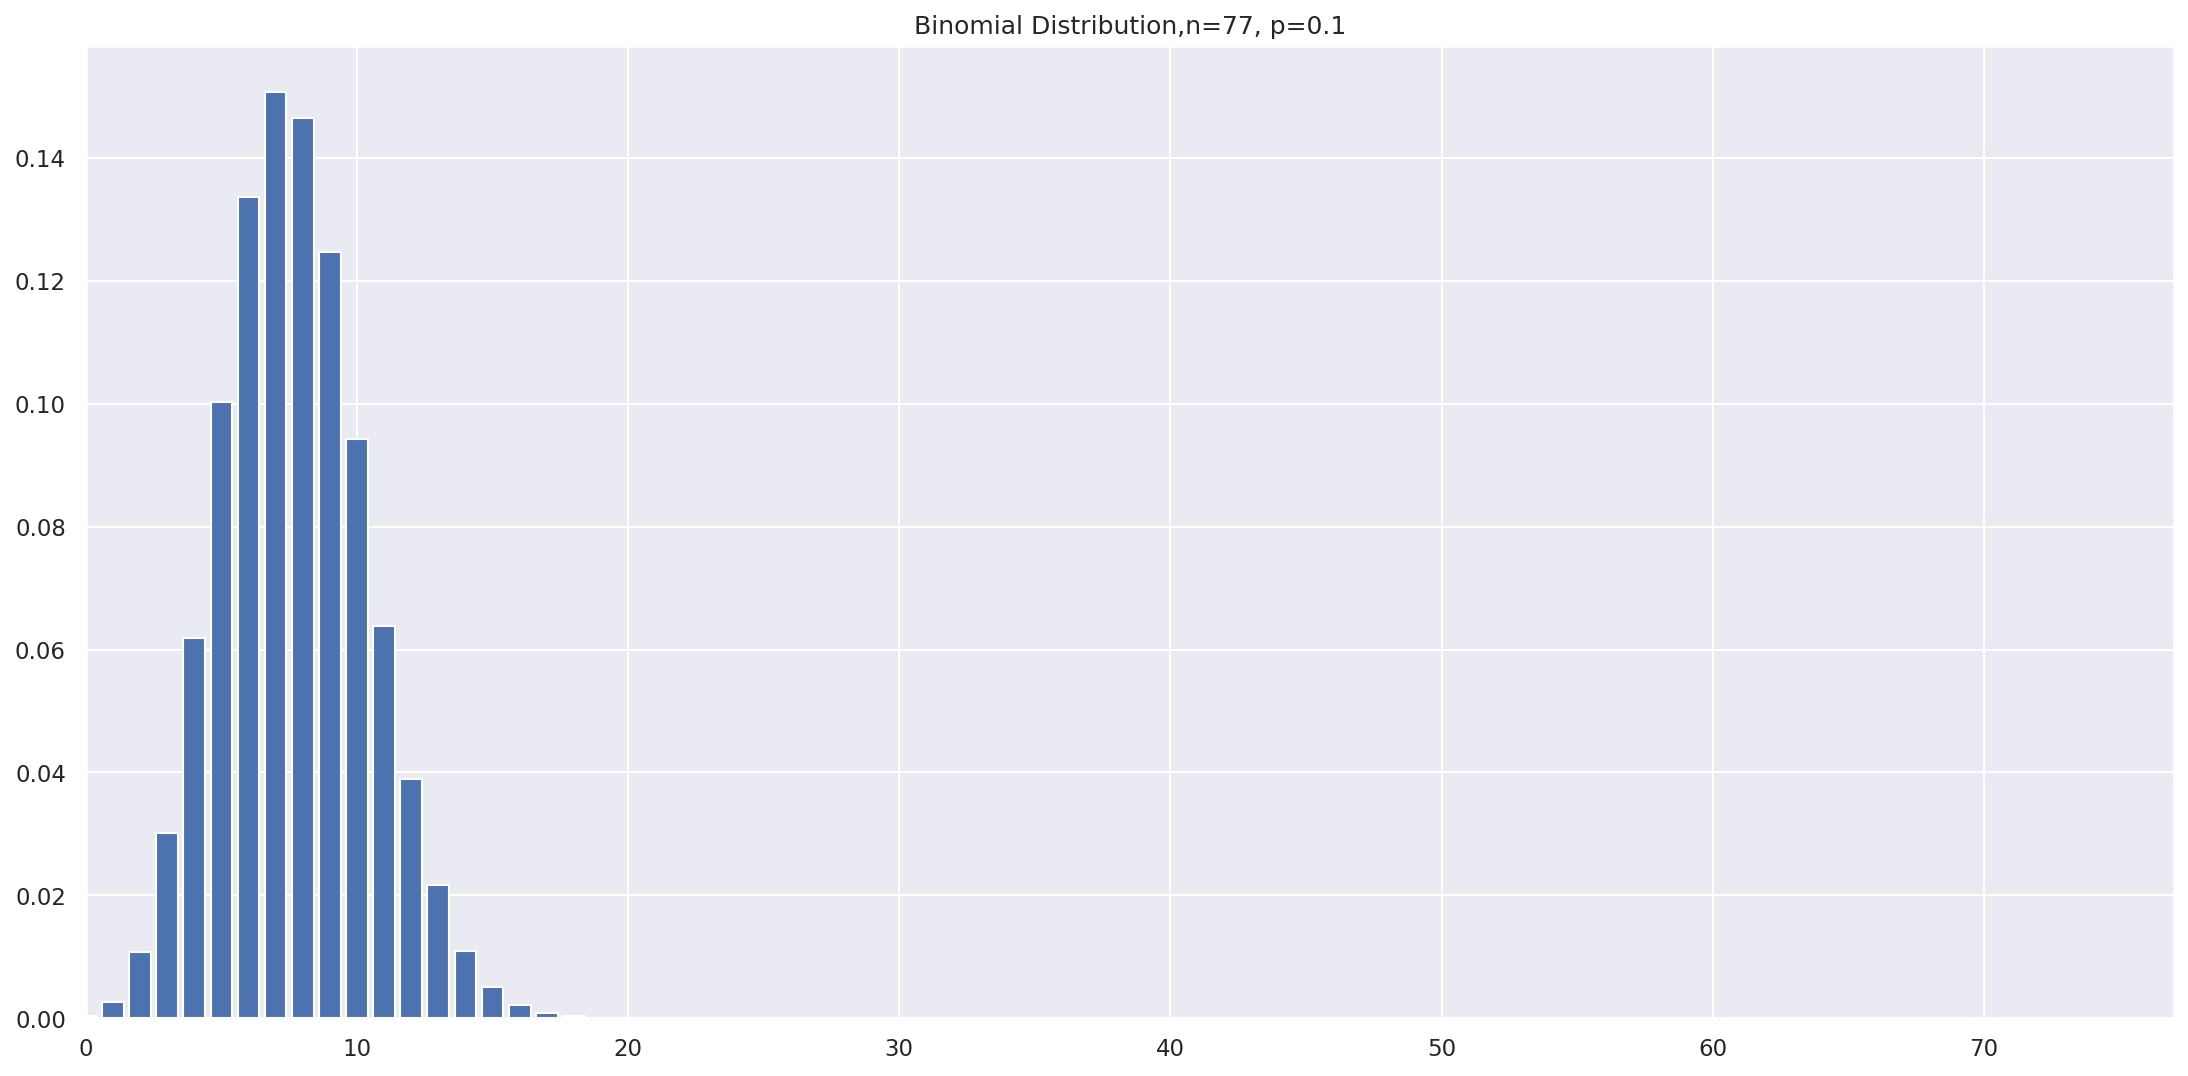

In [270]:
n = 77
p = 0.1

X = np.array(range(78)) 

pmf = stats.binom.pmf(X, n, p)

fig, ax = plt.subplots()

# Note: to plot this distribution we can't use .hist, because we don't 
# have an array of data, 
# Instead we use .bar because we have an array of probabilities 

ax.bar(X, pmf);

plt.xlim(0,77)

# Fill in the correct values for n and p in the title:
plt.title(f"Binomial Distribution,n={n}, p={p}"); # I used a python fString

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 1e (1 point)


The Cumulative Distribution Function (CDF), $F(a)$ of a Random Variable $X$ is defined as:

$F(a) = P(X \leq a)$

`scipy.stats` has the CDF as a built-in function.  


**Use `stats.binom.cdf()` to calculate the following probabilities:** 

 - **i).** What is the probability that **at most** $10$ people in your sample are left-handed?

 - **ii).**  Re-do question 1b(ii) using the CDF function:  What is the probability that **at least** $7$ people and **at most** $10$ people in your sample are left-handed?    (Hint: you will need to use subtraction as part of your calculation).


In [271]:
n = 77
p = 0.1
k = 10

prob_at_most_10 = stats.binom.cdf(k, n, p)
print(round(prob_at_most_10, 3))

x = 10-7

prob_7_to_10 = stats.binom.cdf(10, n, p) - stats.binom.cdf(6, n, p)
print(round(prob_7_to_10, 3))

0.856
0.516


In [272]:
grader.check("q1e")

q1e results: All test cases passed!

**Randomly Sampling From a Distribution** 

`scipy.stats` has built-in methods `.rvs` to generate random samples from common distributions.  

To generate random samples from a Binomial distribution we can use `stats.binom.rvs(n, p, size)` , where size is the size of the random sample (assuming with replacement()


   
 -  Run the code below to randomly sample 15 times from a Binomial distribution with $n=25$ and $p = 0.20$:

In [273]:
x = stats.binom.rvs(n=20, p=0.20, size=15)
x

array([4, 5, 4, 5, 8, 2, 2, 4, 6, 3, 5, 3, 4, 1, 2])

<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 1f (5 points)

We can approximate the theoretical distribution of _Bin(n,p)_ by drawing many random samples from the distribution and plotting a **density** histogram of the sample data. 

In the code below, you are going to repeatedly draw random samples from a Bin(77, 0.10) distribution using sample sizes of 50, 500 and 5000 and plot the resulting empirical distributions of your samples.  

You'll then compare this to the theoretical distribution you plotted in 1d.

Fill in all the ellipses (...) in the code below to complete this.


You should see that the empirical distributions approach the theoretical distribution as the sample size increases.  





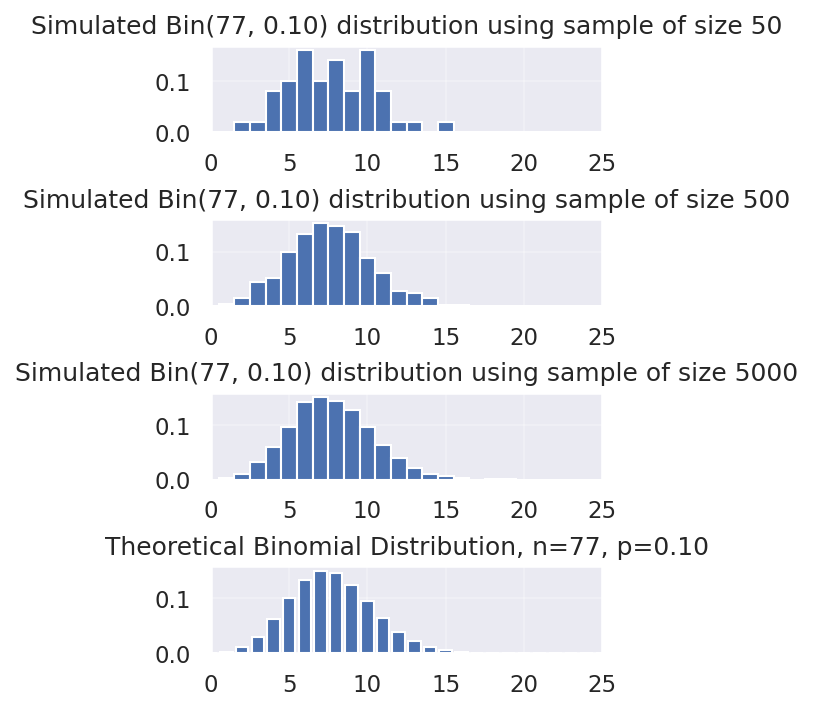

In [274]:

#Randomly sample 50 values from Bin(77,0.10)
sample_50 = stats.binom.rvs(n=77, p=0.1, size=50)

#Randomly sample 500 values from Bin(77,0.10)
sample_500 = stats.binom.rvs(n=77, p=0.1, size=500)

#Randomly sample 5000 values from Bin(77,0.10) 
sample_5000 = stats.binom.rvs(n=77, p=0.1, size=5000)

# Theoretical
n = 77
p = 0.1

X = np.array(range(78)) 

pmf = stats.binom.pmf(X, n, p)

# Create a figure that will have 4 subplots (4 histograms))
fig, ax = plt.subplots(nrows=4, ncols=1, figsize = (3,5))


plt.subplots_adjust(hspace=1)

# Plot a density histogram of the sample data of size 50
# ax[0] indicates we are going to plot this distribution in the first out of 4 subplots
# Use density histogram because we are binning a list of simulated numbers to estimate the probabilities
ax[0].hist(sample_50, density=True, bins = np.arange(-0.5, 100, 1))
ax[0].set_axisbelow(True)
ax[0].grid(alpha=0.25)
ax[0].set_xlim([0, 25]);
ax[0].set_title("Simulated Bin(77, 0.10) distribution using sample of size 50")



# Use the same format as above to plot 
# a density histogram of the sample data of size 500.
# Note, to put this as the 2nd plot out of 4, use ax[1] (instead of ax[0])
ax[1].hist(sample_500, density=True, bins=np.arange(-0.5,100,1))
ax[1].set_axisbelow(True)
ax[1].grid(alpha=0.25)
ax[1].set_xlim([0, 25]);
ax[1].set_title("Simulated Bin(77, 0.10) distribution using sample of size 500")

# Plot a density histogram of the sample data of size 5000
ax[2].hist(sample_5000, density=True, bins=np.arange(-0.5,100,1))
ax[2].set_axisbelow(True)
ax[2].grid(alpha=0.25)
ax[2].set_xlim([0, 25]);
ax[2].set_title("Simulated Bin(77, 0.10) distribution using sample of size 5000")


# Plot the actual theoretical distribution.  Use bar because we know the exact probabilities:
ax[3].bar(X, pmf)
ax[3].set_axisbelow(True)
ax[3].grid(alpha=0.25);
ax[3].set_xlim([0, 25]);
ax[3].set_title("Theoretical Binomial Distribution, n=77, p=0.10")

plt.show()

<!-- END QUESTION -->


You should see that the simulated/empirical distributions approach the theoretical distribution as the sample size increases.  

[Back to top](#top)

<a id='p2'></a>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>   Question 2: Poisson Distribution Video Assignment (6 pts) ## 

#### Complete this [Video Assignment (click this link)](https://canvas.colorado.edu/courses/117881/assignments/2314877) available on Canvas (to receive points you must watch the entire video and answer the embedded questions).


As you watch the video, fill in the code below along with the video so you can practice with the concepts in the video.



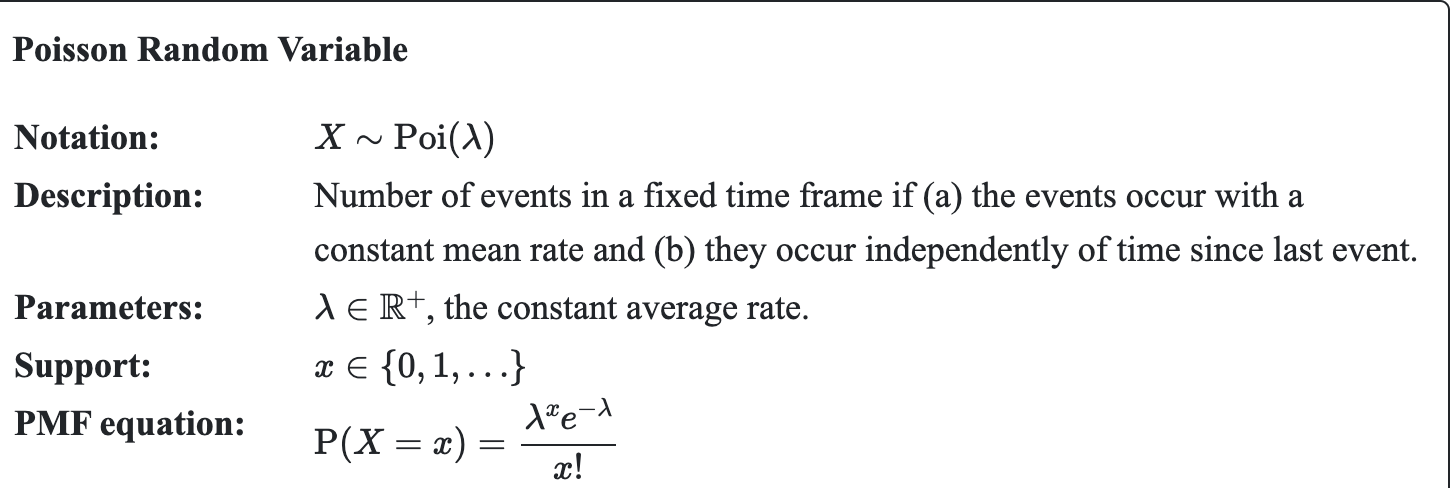

**Example:**  There are an average of 2.79 major earthquakes in the world each year, and major earthquakes occur independently (assume we're ignoring aftershocks).  What is the probability of exactly 3 major earthquakes happening next year?

In [275]:
# Calculate using the Poisson PMF formula

l = 2.79 # average of major earthquakes happening
x = 3 # probability of 3 happening next year.

p_pmf = (pow(l, x) * np.exp(-l))/special.factorial(x)
p_pmf

0.22232062512462494

We can also calculate this directly using built-in PMF function in Scipy:
https://docs.scipy.org/doc/scipy/reference/stats.html 


In [276]:
# Calculate using Scipy built-in PMF function

k = np.array(range(15))

sci_pmf = stats.poisson.pmf(k, 2.79)
sci_pmf

array([6.14212139e-02, 1.71365187e-01, 2.39054436e-01, 2.22320625e-01,
       1.55068636e-01, 8.65282989e-02, 4.02356590e-02, 1.60367841e-02,
       5.59282845e-03, 1.73377682e-03, 4.83723733e-04, 1.22689929e-04,
       2.85254084e-05, 6.12199149e-06, 1.22002545e-06])

Plot the PMF of $X\sim Poi(3)$ 

<BarContainer object of 15 artists>

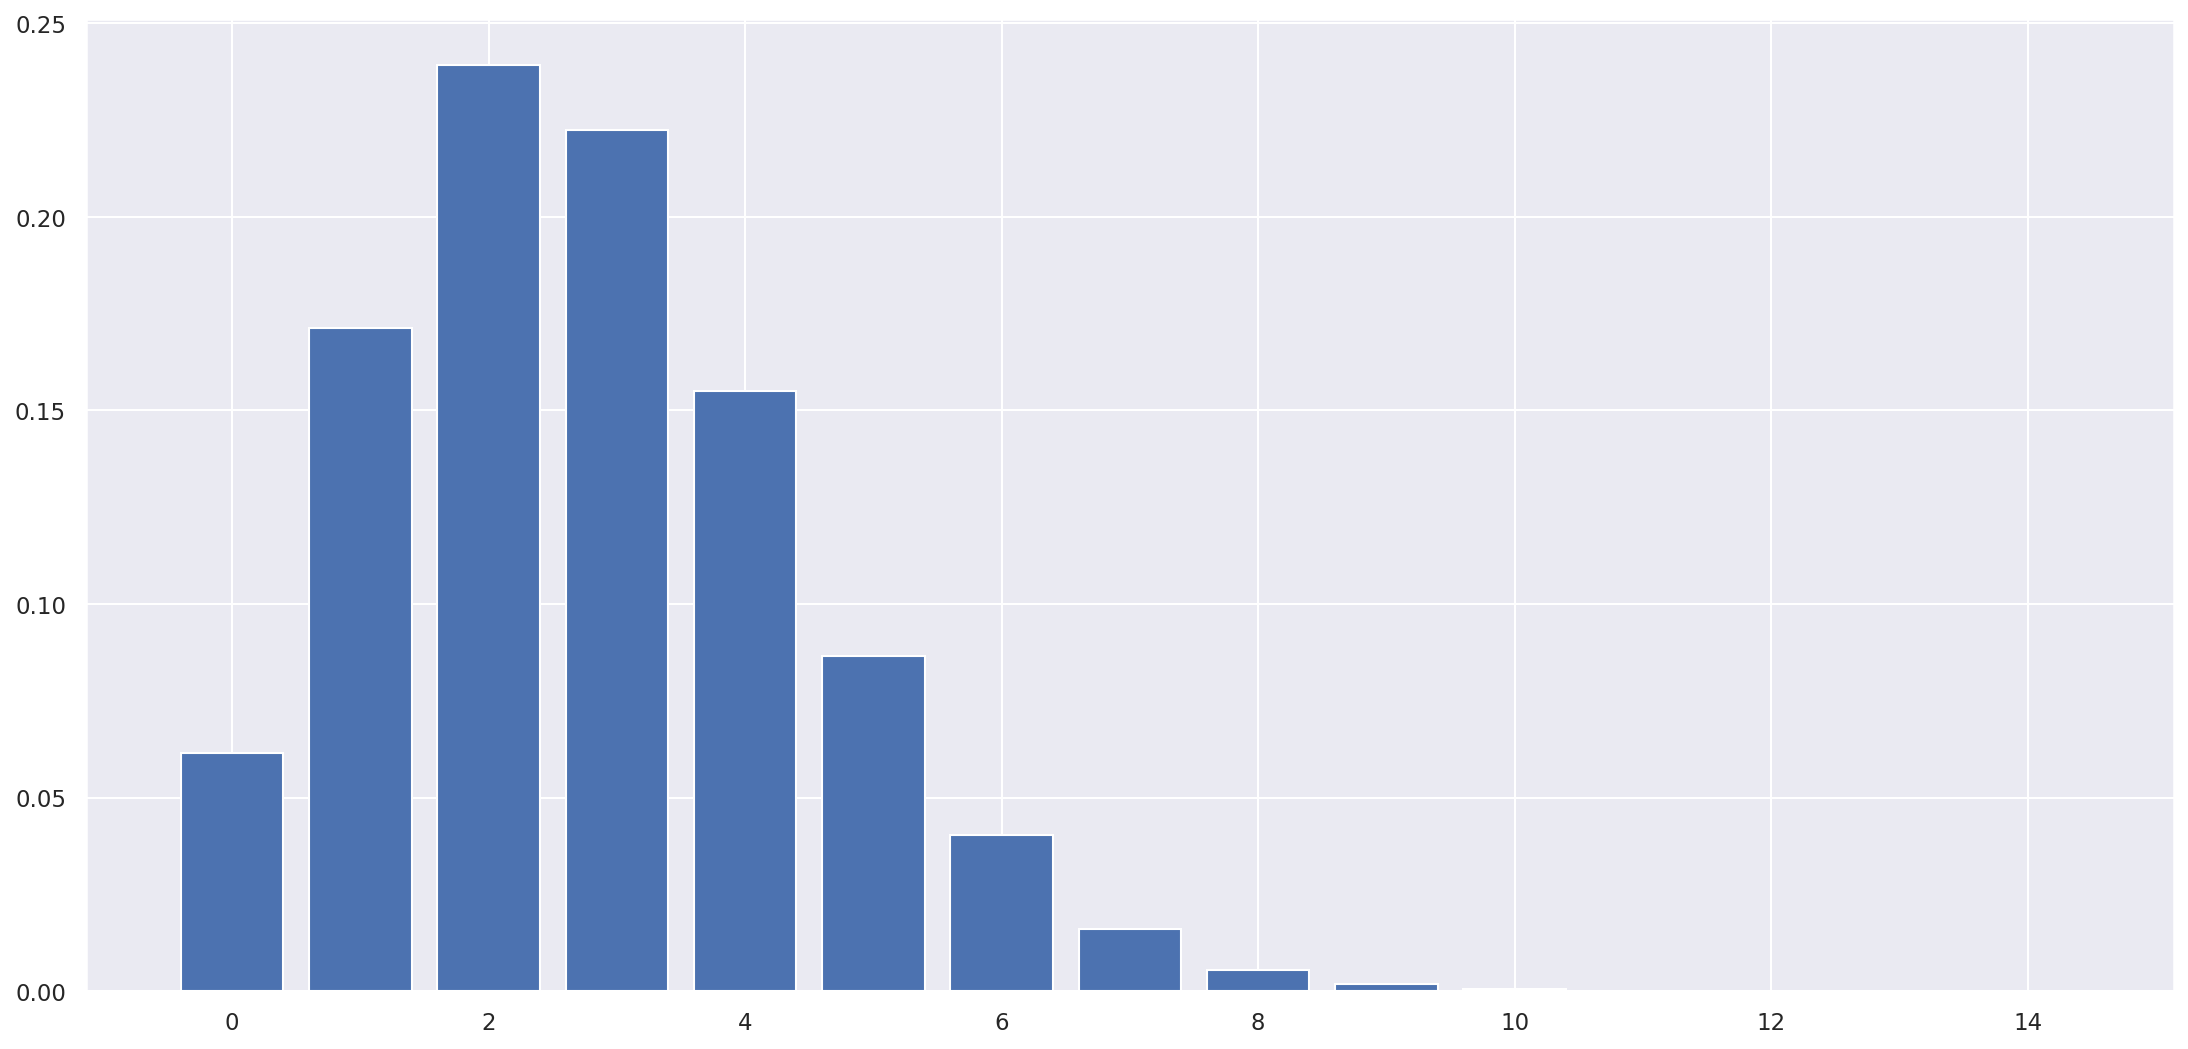

In [277]:
plt.bar(k, sci_pmf)

What is the probability that **at least** 3 earthquakes happen next year?  Calculate using the PMF formula.  


In [278]:
# P(X >= 3) = 1 - P(X<3)

sum(sci_pmf[0:3])

0.4718408363557267

In [279]:
1-sum(sci_pmf[0:3])

0.5281591636442733

We can also calculate this directly using built-in CDF function in Scipy:

Use Scipy's CDF to calculate the probability that **at least** 3 earthquakes happen next year.    

In [280]:
1-stats.poisson.cdf(2, 2.79)

0.5281591636442738

In [281]:
1-stats.poisson.cdf(1, 1.2)

0.33737273379315535

**Example:**  There are an average of 2.79 major earthquakes in the world each year, and major earthquakes occur independently (assume we're ignoring aftershocks).  What is the probability of exactly 3 major earthquakes happening in the next 60 days?


Y: # of major quakes in the next 60 days
Time interval: 60 days
lambda = average # of earthquakes/time interval

2.79/365 * 60 

In [282]:
lamb = 2.79/365*60 # average # of quakes/time interval
stats.poisson.pmf(3, lamb)

0.010163796932713177

Plot the PMF of $X\sim Poi(\lambda)$, for various different values of $\lambda$, and compare/contrast how $\lambda$ affects the distribution.

<BarContainer object of 10 artists>

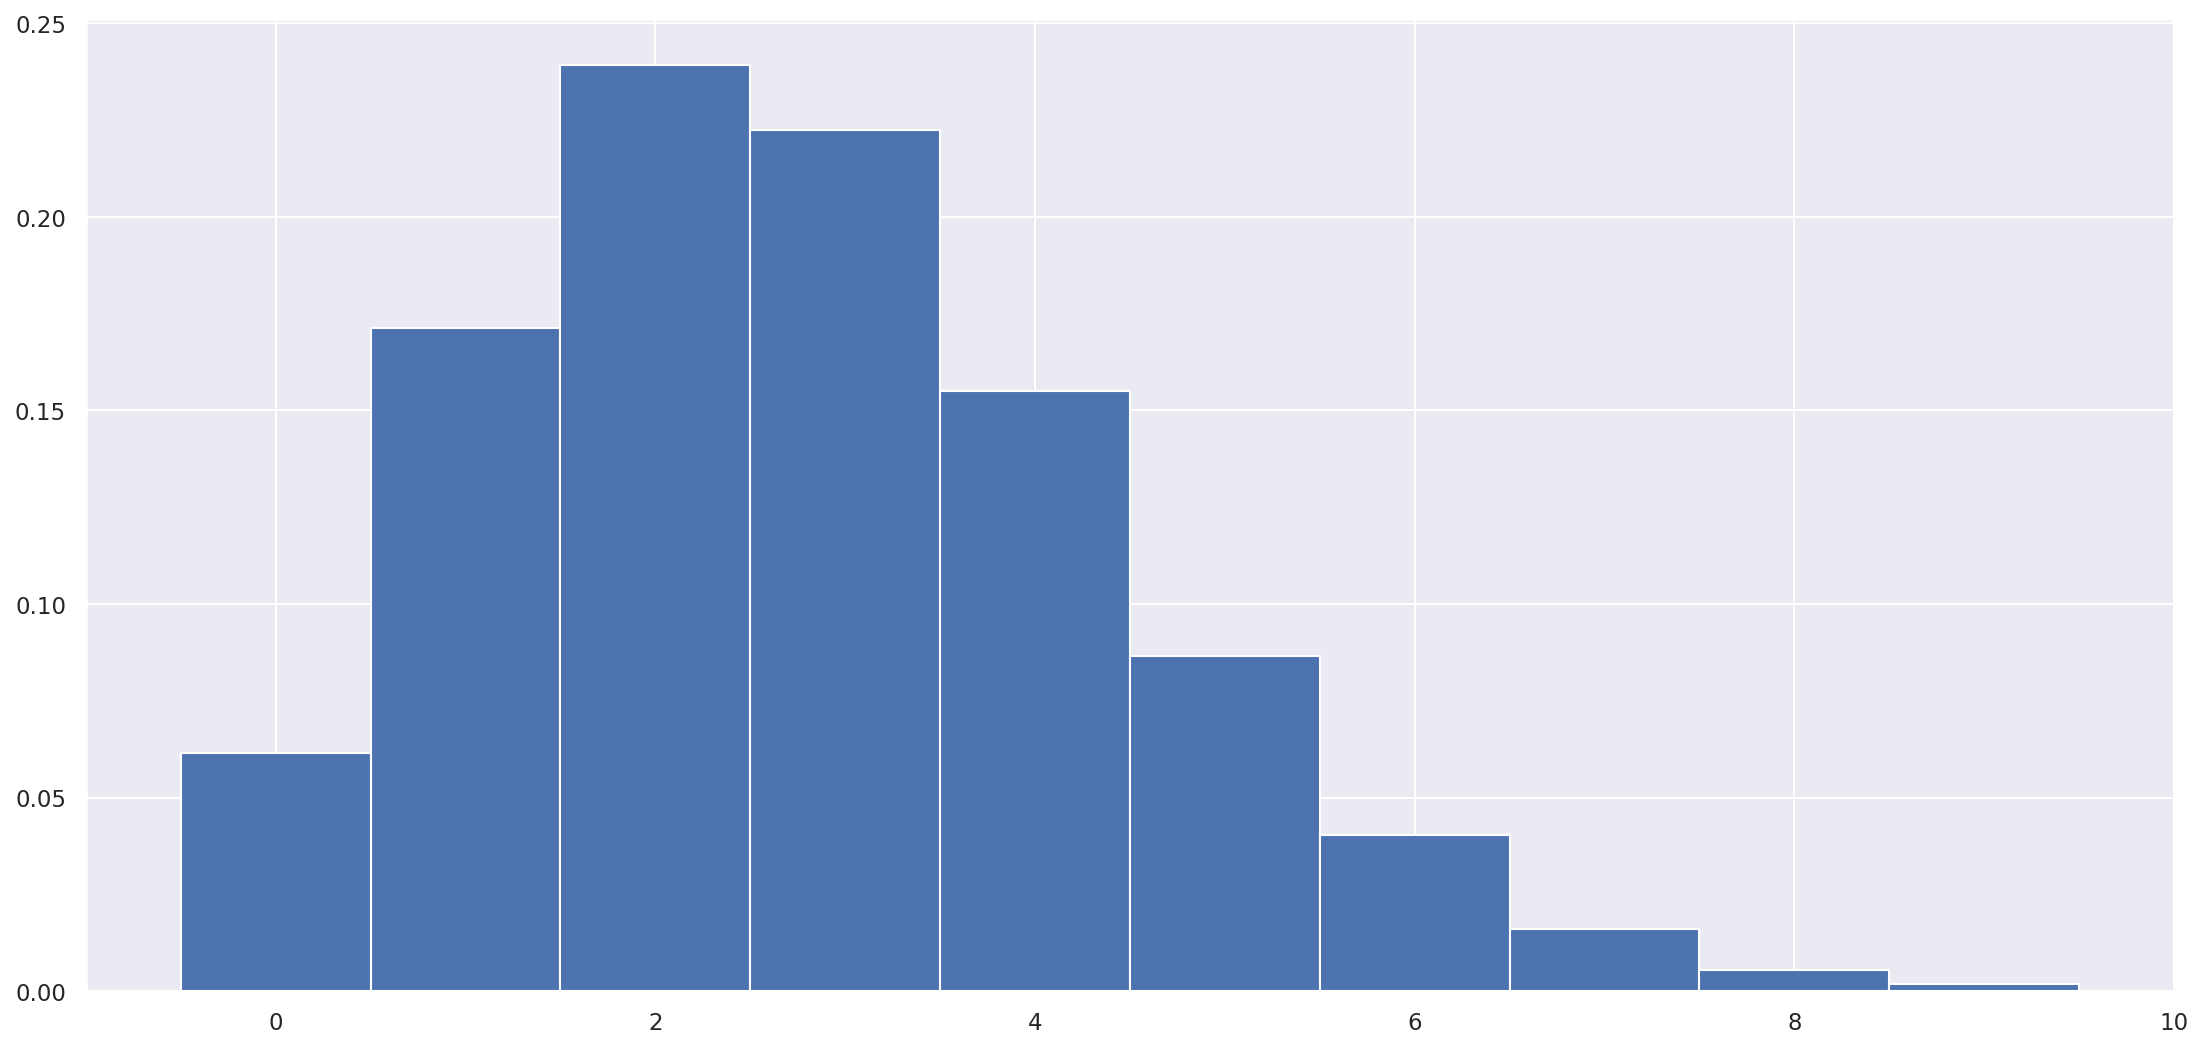

In [283]:
k = np.array(range(10))

pmf = stats.poisson.pmf(k, 2.79)
plt.bar(k, pmf, width=1, edgecolor='white')

**Randomly sampling from a Poisson distribution:** 

Use Scipy to randomly sample 10 datapoints from a Poisson distribution with $\lambda = 2.79$

In [284]:
stats.poisson.rvs(2.79, size=10)

array([5, 2, 3, 3, 3, 2, 2, 6, 3, 2])

Plot the distribution of a sample of 100 datapoints randomly sampled from a Poisson distribution with $\lambda = 2.79$

(array([0.061, 0.161, 0.247, 0.212, 0.152, 0.103, 0.037, 0.015, 0.006,
        0.005, 0.001, 0.   , 0.   , 0.   , 0.   ]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5]),
 <BarContainer object of 15 artists>)

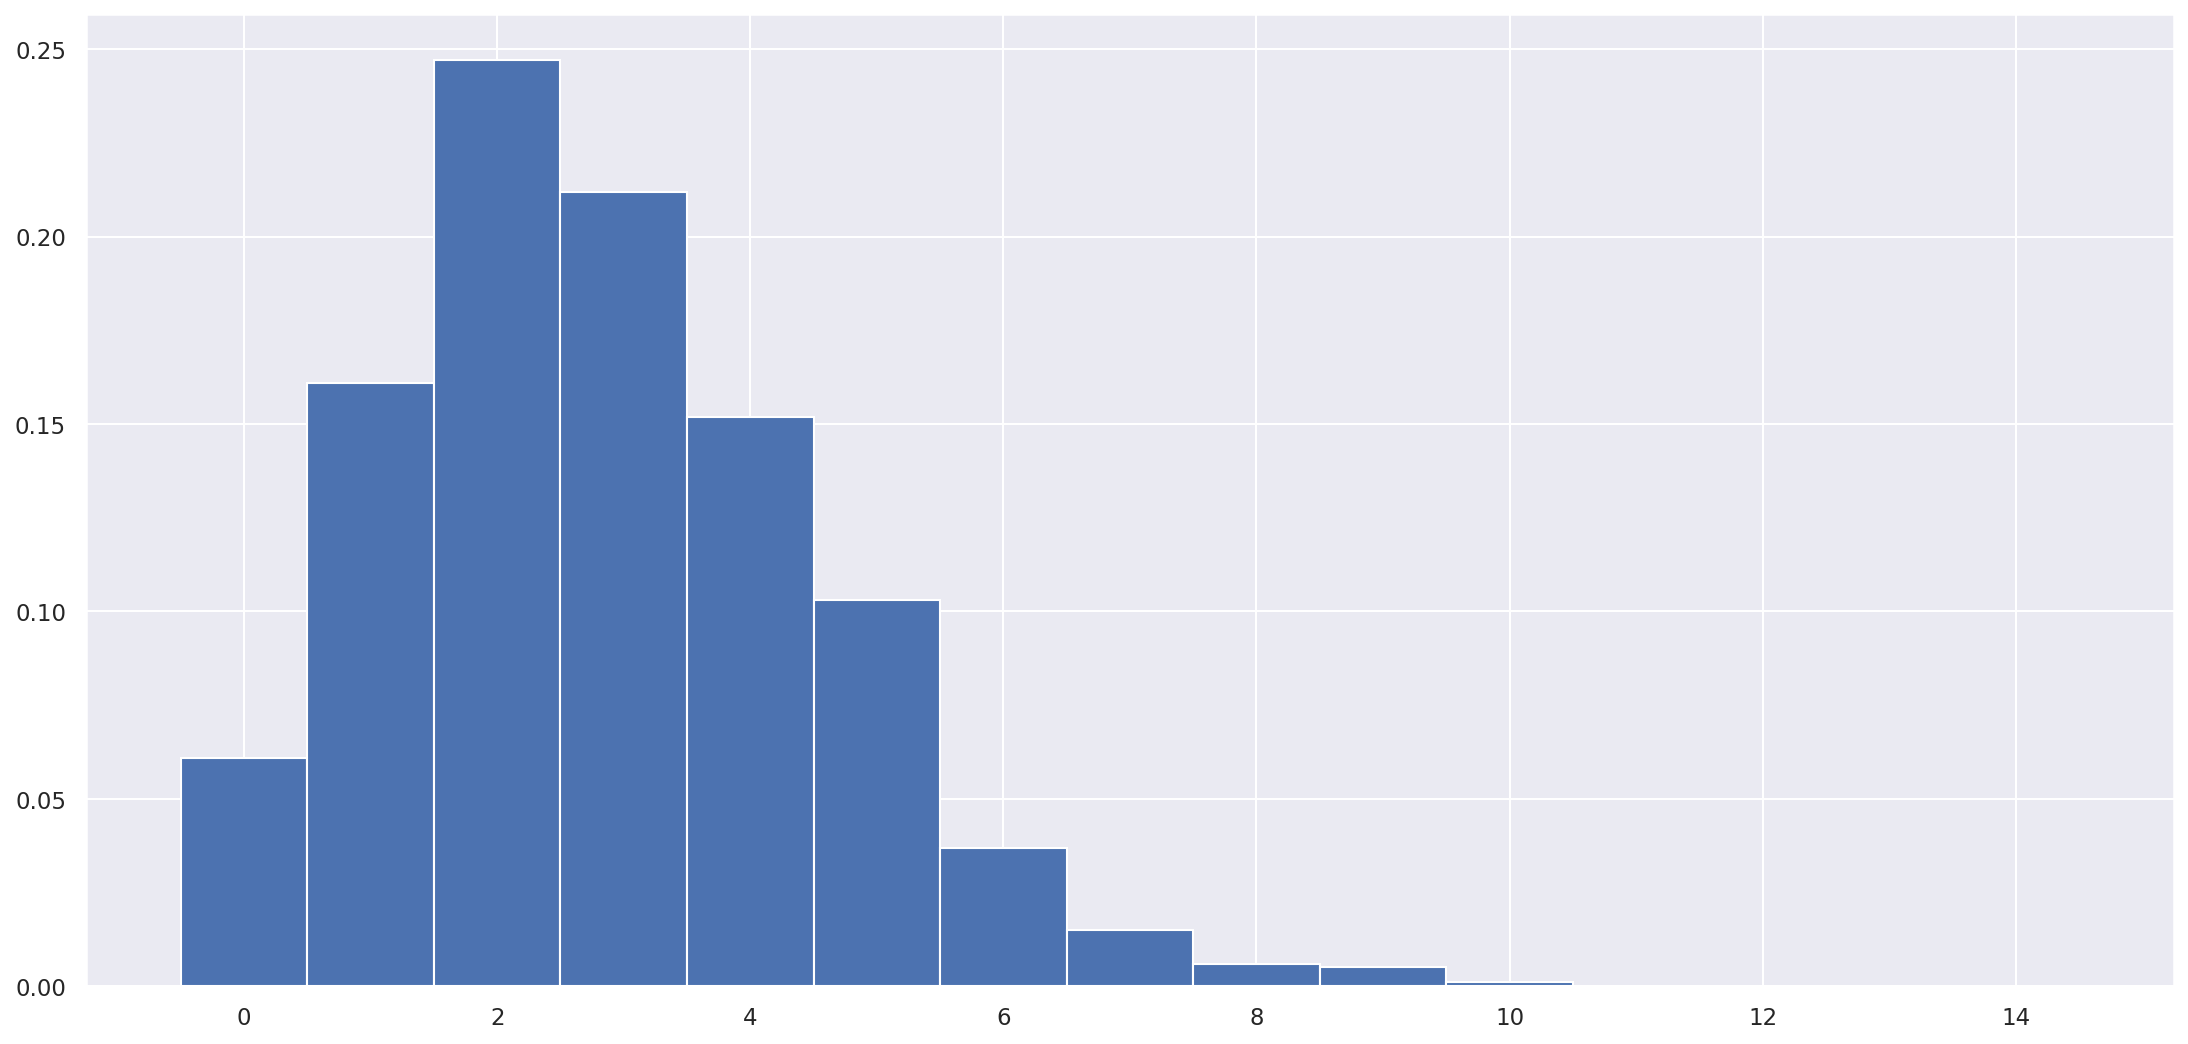

In [285]:
sample=stats.poisson.rvs(2.79, size=1000)

bins=np.arange(-0.5, 15, 1)

plt.hist(sample, density=True, bins=bins)

Let's compare the empirical (i.e. simulated) distribution with the theoretical distribution.  Experiment with how the empirical distribution changes as the sample size increases.

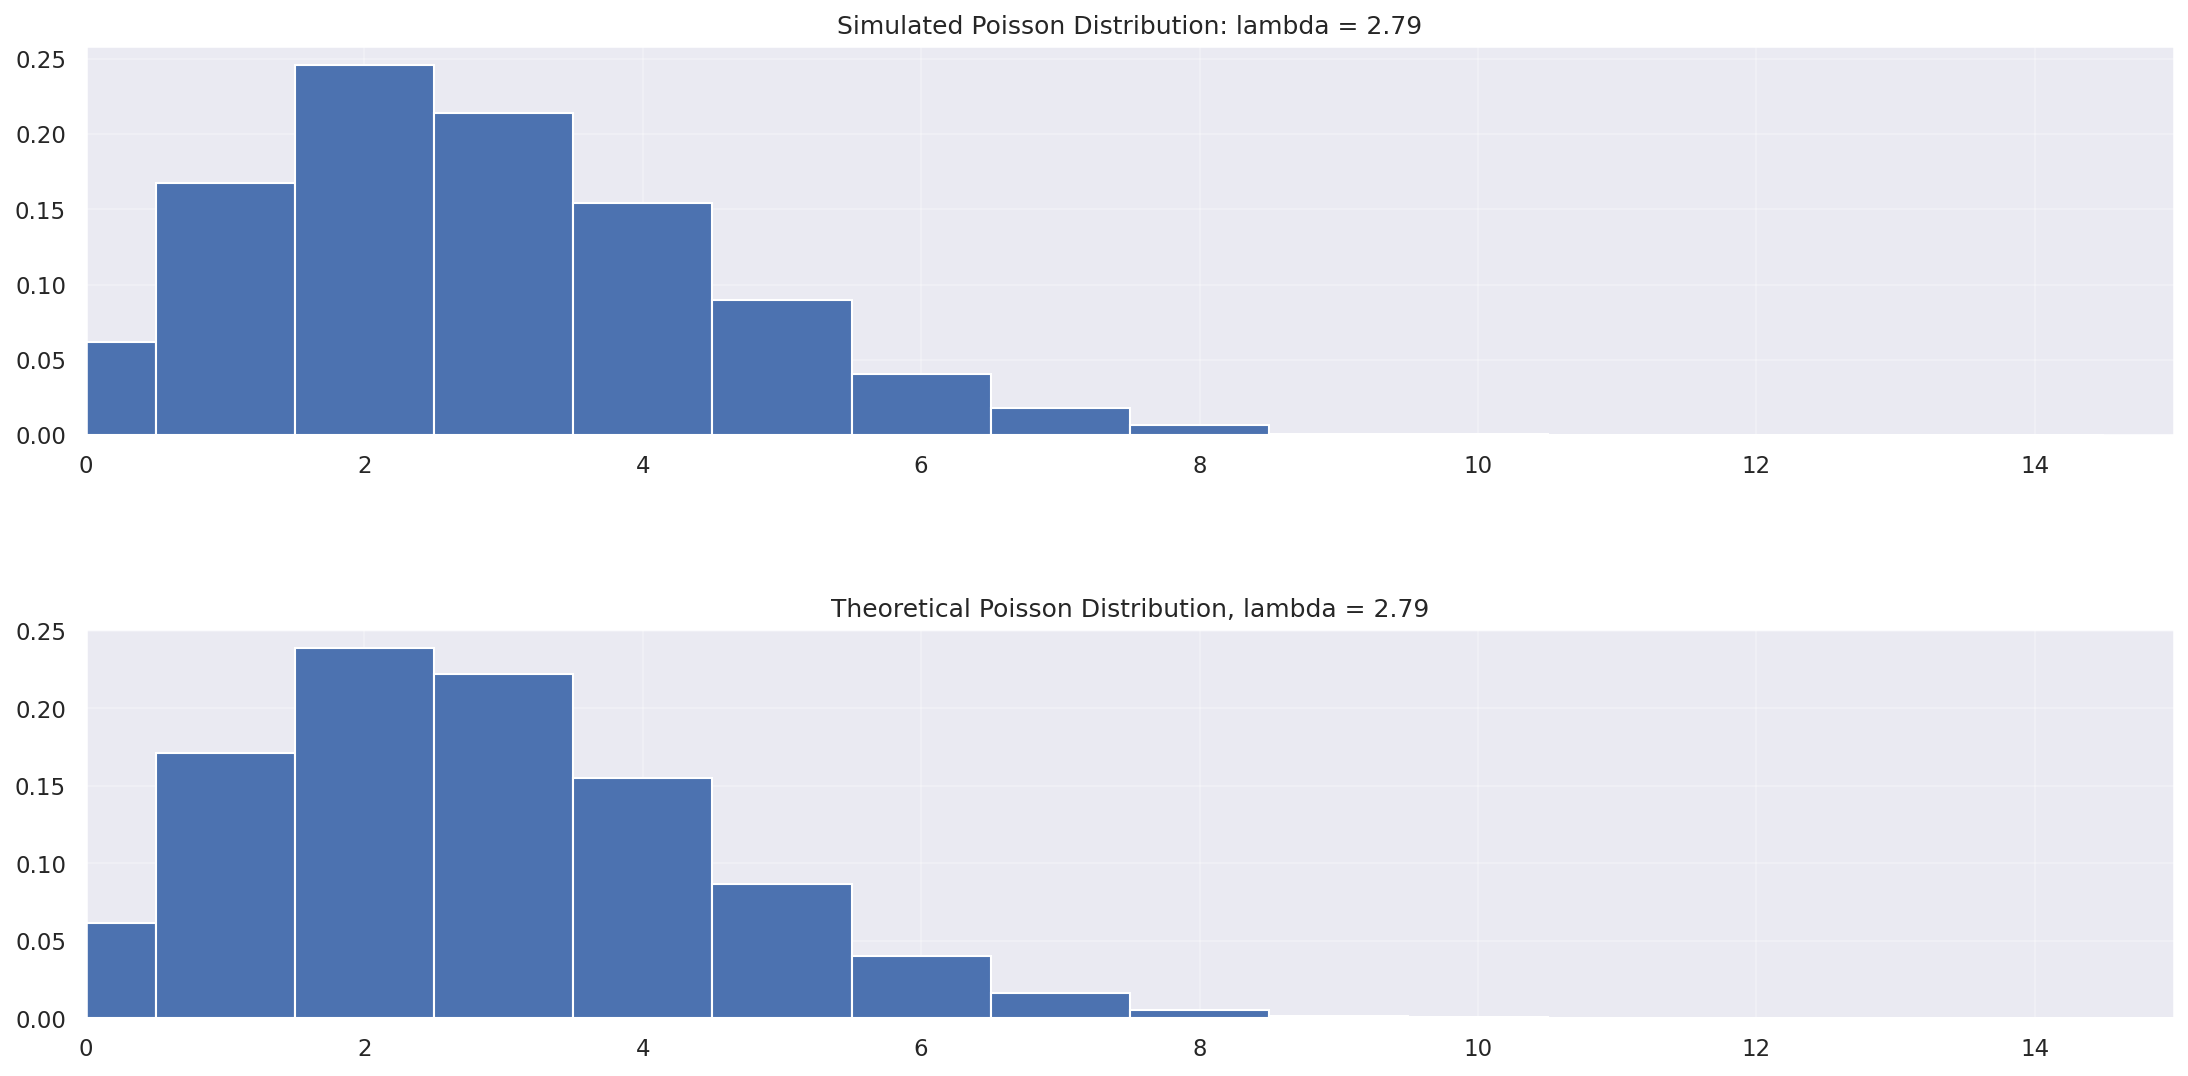

In [286]:
#Simulated Values
sample_size = 5000
sample = stats.poisson.rvs(2.79, size=sample_size)
bins = np.arange(-0.5, 15, 1)

#Actual theoretical probabilities
max = 15
X = np.array(range(max+1))
pmf = stats.poisson.pmf(X, 2.79)

fig, ax = plt.subplots(nrows=2, ncols=1)
plt.subplots_adjust(hspace=0.5)

# Use histogram because we are binning a list of simulate numbers to calculate the probabilities
ax[0].hist(sample, edgecolor='white', density=True, bins=bins)
ax[0].set_axisbelow(True)
ax[0].grid(alpha=0.25)
ax[0].set_xlim([0, 15]);
ax[0].set_title("Simulated Poisson Distribution: lambda = 2.79")


# Use bar because we know the probabilities
ax[1].bar(X, pmf, edgecolor='white', width=1)
ax[1].set_axisbelow(True)
ax[1].grid(alpha=0.25);
ax[1].set_xlim([0, 15]);
ax[1].set_title("Theoretical Poisson Distribution, lambda = 2.79")

plt.show()

<!-- BEGIN QUESTION -->

[Back to top](#top)

<a id='p3'></a>


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 3 (9 points) ##


Let $X$ be a continuous random variable with support $1 \leq x \leq 7$.  

The graph of the PDF $f(x)$ for $X$ is shown here:

<img src="img/PDF.png" width="500"> 

a).  What is $P(3.25\leq X \leq 5)$?  Show all work using LaTex and give your final answer as a fully simplified fraction.

b).  What is $E[X]$?  Show all work using LaTeX and give your final answer as a fully simplified fraction.


Answer both questions in the same cell below using LaTeX.


### Answer

**a)** To solve this, we can use an integral to find the area under the curve.

From $x$ values 3.25 to 4, the slope of the line is $y=0.25$. Thus, the integral would be:

$$
\int_{3.25}^{4} 0.25 dx = 0.25x \biggr|_{3.25}^{4} = 4(0.25) - 3.25(0.25) = \frac{3}{16}
$$

From $x$ values $4$ to $5$, the slope of the line changes. We can find the slope of the entire line by using the point slope formula.

We can use the coordinates $(7,0)$ and $(4, 0.25)$ to find the slope.

$$
\frac{y_2 - y_1}{x_2 - x_1} = \frac{0.25 - 0}{4 - 7} = \frac{0.25}{-3} = -\frac{1}{12}
$$

Now that we have the slope of the line, we can use the formula $y - y_1 = m(x - x_1)$

$$
y-0 = -\frac{1}{12} (x-7)\\
y = -\frac{1}{12} + \frac{7}{12}
$$

Now that we have our formula, we can find the area under the curve.


$$
\int_{4}^5 -\frac{1}{12}x + \frac{7}{12} dx = -\frac{x^2}{24} + \frac{7}{12}x \biggr|_{4}^{5} = \left(-\frac{5^{2}}{24}+\frac{7\left(5\right)}{12}\right)-\left(-\frac{4^{2}}{24}+\frac{7\left(4\right)}{12}\right) = \frac{5}{24}
$$

Now that we have both areas, we can combine them:

$$
\frac{3}{16} + \frac{5}{24} = \frac{19}{48}
$$

<!-- END QUESTION -->

To check your answer to 3a enter it below.  Note that this autograder test is not worth any points, it's just for you to check your work above to make sure you're on the right track. 

In [287]:
answer_3a = 19/48
answer_3a

0.3958333333333333

In [288]:
grader.check("q3_check")

q3_check results: All test cases passed!

<!-- BEGIN QUESTION -->

[Back to top](#top)

<a id='p4'></a>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 4 (8 points)

A factory manufactures solid state hard drives for Seagate Technology. 

For each scenario described below: 
 - i).  State the distribution you could use to model this random variable in the form $RandomVariable\sim DistributionName(parameter\_values)$
 
 - ii).  State any assumptions you need to make to use this distribution to model this situation.  

 - iii). State the support of the Random Variable.



 - iv).  Give the probability distribution for the random variable (i.e. either the pmf or pdf) as a closed-form function.


 

SCENARIOS:


**a).**    Approximately $4\%$ of hard drives that come off of a particular assembly line are defective.  Let $Y$ be the number that are defective in a batch of $300$.  

**b).**  Approximately $4\%$ of hard drives that come off of a particular assembly line are defective.   Let $W$ be whether or not a hard drive is defective.  

**c).**  On average, there are  $8$ defective drives per day.  Let $X$ be the time (in hours) between defective drives.

**d).**  On average, there are $8$ defective drives per day.  Let $M$ be the number of defective drives in a day.  


Answer all parts (a-d) below in the same cell:



### Answer

#### Scenario A:

**i)** The distribution used to model this random variable would be: $Y \sim Bin(300, 0.04)$.

**ii)** Since we are using the binomial distribution, we need to assume that the probability of success and failure is the same for each trial.

**iii)** The support of the Binomial distribution is $\{0, 1,...,n\}$. In this case, the support is $300$ since the batch size is $300$.

**iv)** The probability distribution can be reprsented by the closed form function:

$$
P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}
$$

Let $n=300$ for the amount of drives in the batch.

Let $p=0.04$ which is the probability of defective drives in the batch.

Let $k=12$ for the amount of defective drives in the batch. This can be found by taking $n * p = 300 * 0.04 = 12$


The closed form function with all the values would look like:

$$
P(X=k) = \binom{300}{12}(0.04)^{12}(1-0.04)^{300-12}
$$

#### Scenario B:

**i)** The distribution used to model this random variable would be: $W \sim Ber(0.04)$

**ii)** Since we are using the Bernoulli distribution, we assume that there are only two possibilities: success and failure.

We also assume that these events are independent events and they do not influence each other whatsoever.

**iii)** The support of the Bernoulli distribution is $\{0, 1\}$ since there are only two possibilities: success and failure.

**iv)** We can model this by using the closed form function:

$$
P(X=k) = \\
p \ \text{if} \ x = 1 \\
1-p \ \text{if} \ x = 0
$$

Let $p=0.04$ which is the probability of defective drives

Let $k= 0, 1$ which is the indicator of failure and success respectively.

The closed form function would look like:

$$
P(X=1) = 0.04\\
P(X=0) = 1-0.04
$$

Keep in mind that a "success" would be if we found a defective drive.


#### Scenario C:

**i)** The distribution used to model this random variable would be the Exponential distribution: $X \sim Exp(8)$
because we are measuring the time in between when defecive drives are found.

**ii)** Since we are using the Exponential distribution, we assume that the events are independent and constant over time.

**iii)**  The support of the Exponential distribution is all positive real numbers.

**iv)** The probability distribution can be modeled using the closed form function:


$$
P(X=x) = \lambda e^{-\lambda x}
$$

Let $\lambda=8$, which is the number of defects found in a given time interval per day.

Let $x$ be the duration of time until a defective device is found.


#### Scenario D:

**i)** In this scenario, we would use the Poisson distribution which can be modeled as: $M \sim Poi(8)$

**ii)** Since we are using the Poisson distribution we have to assume that the events happen independently of each other, and that they occur with a known, constant rate.

**iii)** The support for the Poisson dsitribution is the set of all non-negative natural numbers.

**iv)** We can model this Poisson distribution using the closed form function:

$$
P(X=k)=e^{-\lambda}\frac{\lambda^k}{k!}
$$

Let $\lambda=8$ which is the amount of defective drives per day.

Let $k$ be the probability of an arbitrary amount of defective drives found in a given time limit.


# <!-- END QUESTION -->

[Back to top](#top)

<a id='p5'></a>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 5

The Huffmeister floodplane in Houston has historically been estimated to flood at an average rate of $1$ flood every $500$ years. A flood plane with that rate of flooding is called a $500$ year floodplane.      You can assume the time that each flood occurs is independent and the average number of floods over time is constant.  

<!-- BEGIN QUESTION -->

### <span style='color:Red'>  Question 5a (4 points)

What is the probability that a flood will occur within the next 90 years?   Fully justify/show all steps and write your answer using LaTeX.  Round your final answer to 3 decimal places.  

### Answer

We can use the Poisson distribution.

First, since we have that the average flood rate of 1 happens every 500 years, which means that $\frac{1}{500}$ happen per year.

Since we are interested in calculating the event that at least one flood will occur within the next 90 years, we can go find the complement of no floods occuring first.


Let $\lambda=\frac{90}{500}$ because we are interested in the next 90 years. $X \sim Poi(0.18)$

Let $k= 0$ for the probability that no floods will occur

$$
P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} = \frac{\frac{90}{500}^0 e^{-90/500}}{0!} = 0.8352702114
$$

Now, we can just find the complement of this to get the probability that at least one flood will happen.

$$
1-0.8352702114 = 0.1647297886
$$

<!-- END QUESTION -->

To check your answer to part (a), enter it in the cell below.  Note that this check is not worth any points.  To receive credit you must fully justify your answer in the cell above.

In [289]:
lamb = (1/500)*90

q5a_answer = 1-pow(np.e, -lamb)
q5a_answer

0.164729788588728

In [290]:
grader.check("q5a_check")

q5a_check results: All test cases passed!

### <span style='color:Red'>  Question 5b (2 points)

What is the **expected number** of years until the next flood?

In [291]:
q5b_answer = 500

In [292]:
grader.check("q5b")

q5b results: All test cases passed!

[Back to top](#top)

<a id='p6'></a>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 6

The weekly amount of money spent on maintainence and repairs by a company was observed over a long period of time to be approximately normally distributed with mean $\$500$ and variance $\$400$.   

Let $W$ represent the weekly amount of money spent on maintenance/repairs.  

That is, $W \sim N(500,400)$.




<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 6a (2 points)

Graph the pdf of $W$ on the domain $400\leq W \leq600$ 

(Hint: use `plt.plot` and an appropriate method from  `scipy.stats.norm`: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). **Be sure to carefully read what parameters the method takes as inputs.**



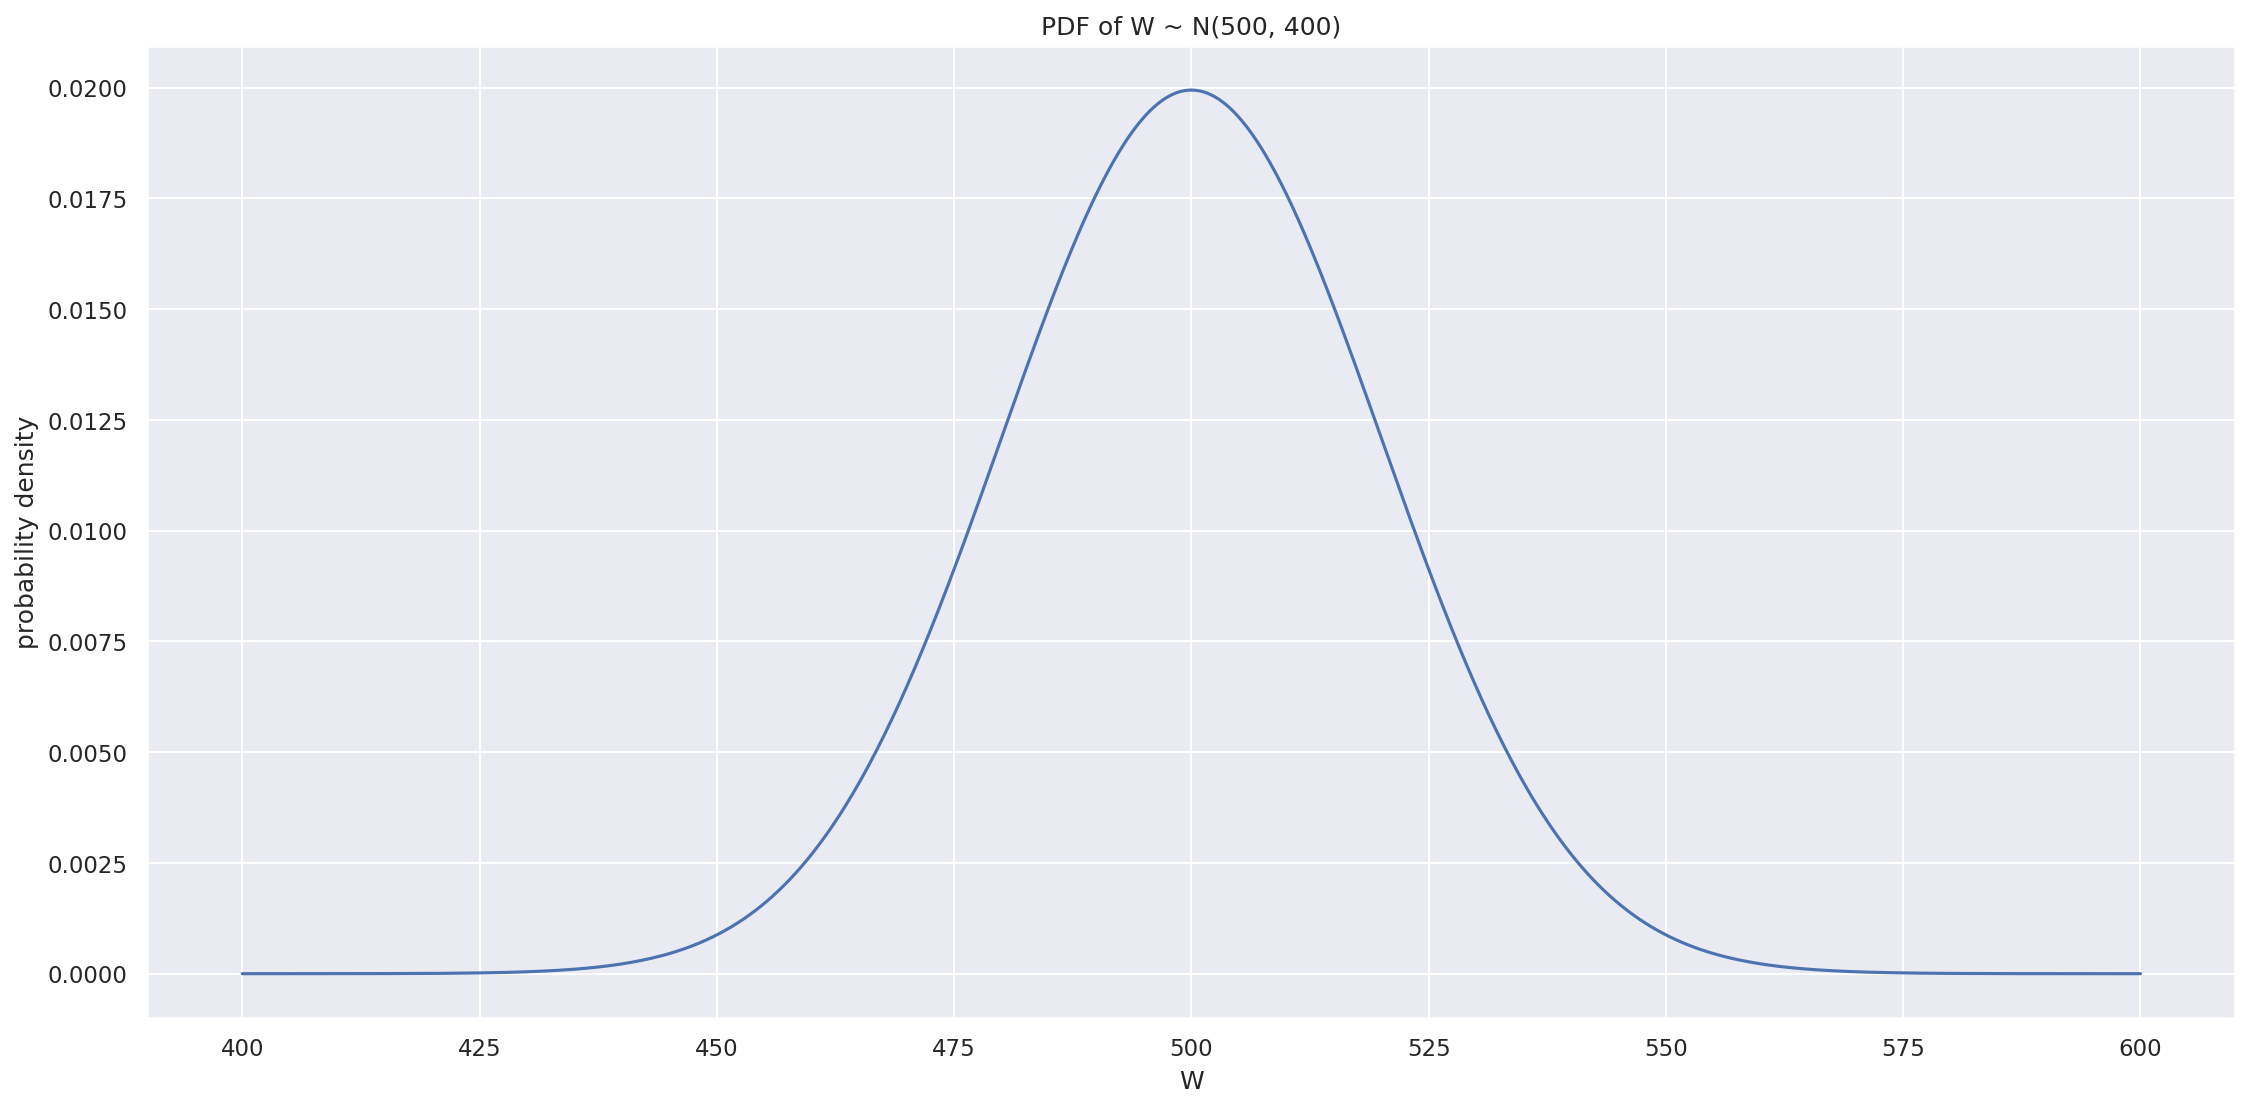

In [293]:

# Create a vector of w values between 400 and 600
w = np.linspace(400, 600, 1000)  # P(400 < X < 600)

m = 500 # mean
s = 20 # standard deviation

norm = stats.norm.pdf(w, m, s)
# Your code above this line


plt.title("PDF of W ~ N(500, 400)")
plt.ylabel("probability density")
plt.xlabel("W")
plt.plot(w, norm)


plt.show()

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 6b (1 point)

If $\$475$ is budgeted for next week, what is the probability that the actual costs will exceed the budgeted amount?   

Use an appropriate method from  `scipy.stats.norm` to calculate this:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html



In [294]:
exceed_budget = 1-stats.norm.cdf(475, m, s) # P(X > 475)

print("P(W > 475) = {:.4f}".format(exceed_budget))

P(W > 475) = 0.8944


In [295]:
grader.check("q6b")

q6b results: All test cases passed!

We can show graphically what your answer above means using the following code.  Read through the code so you understand what it is doing.

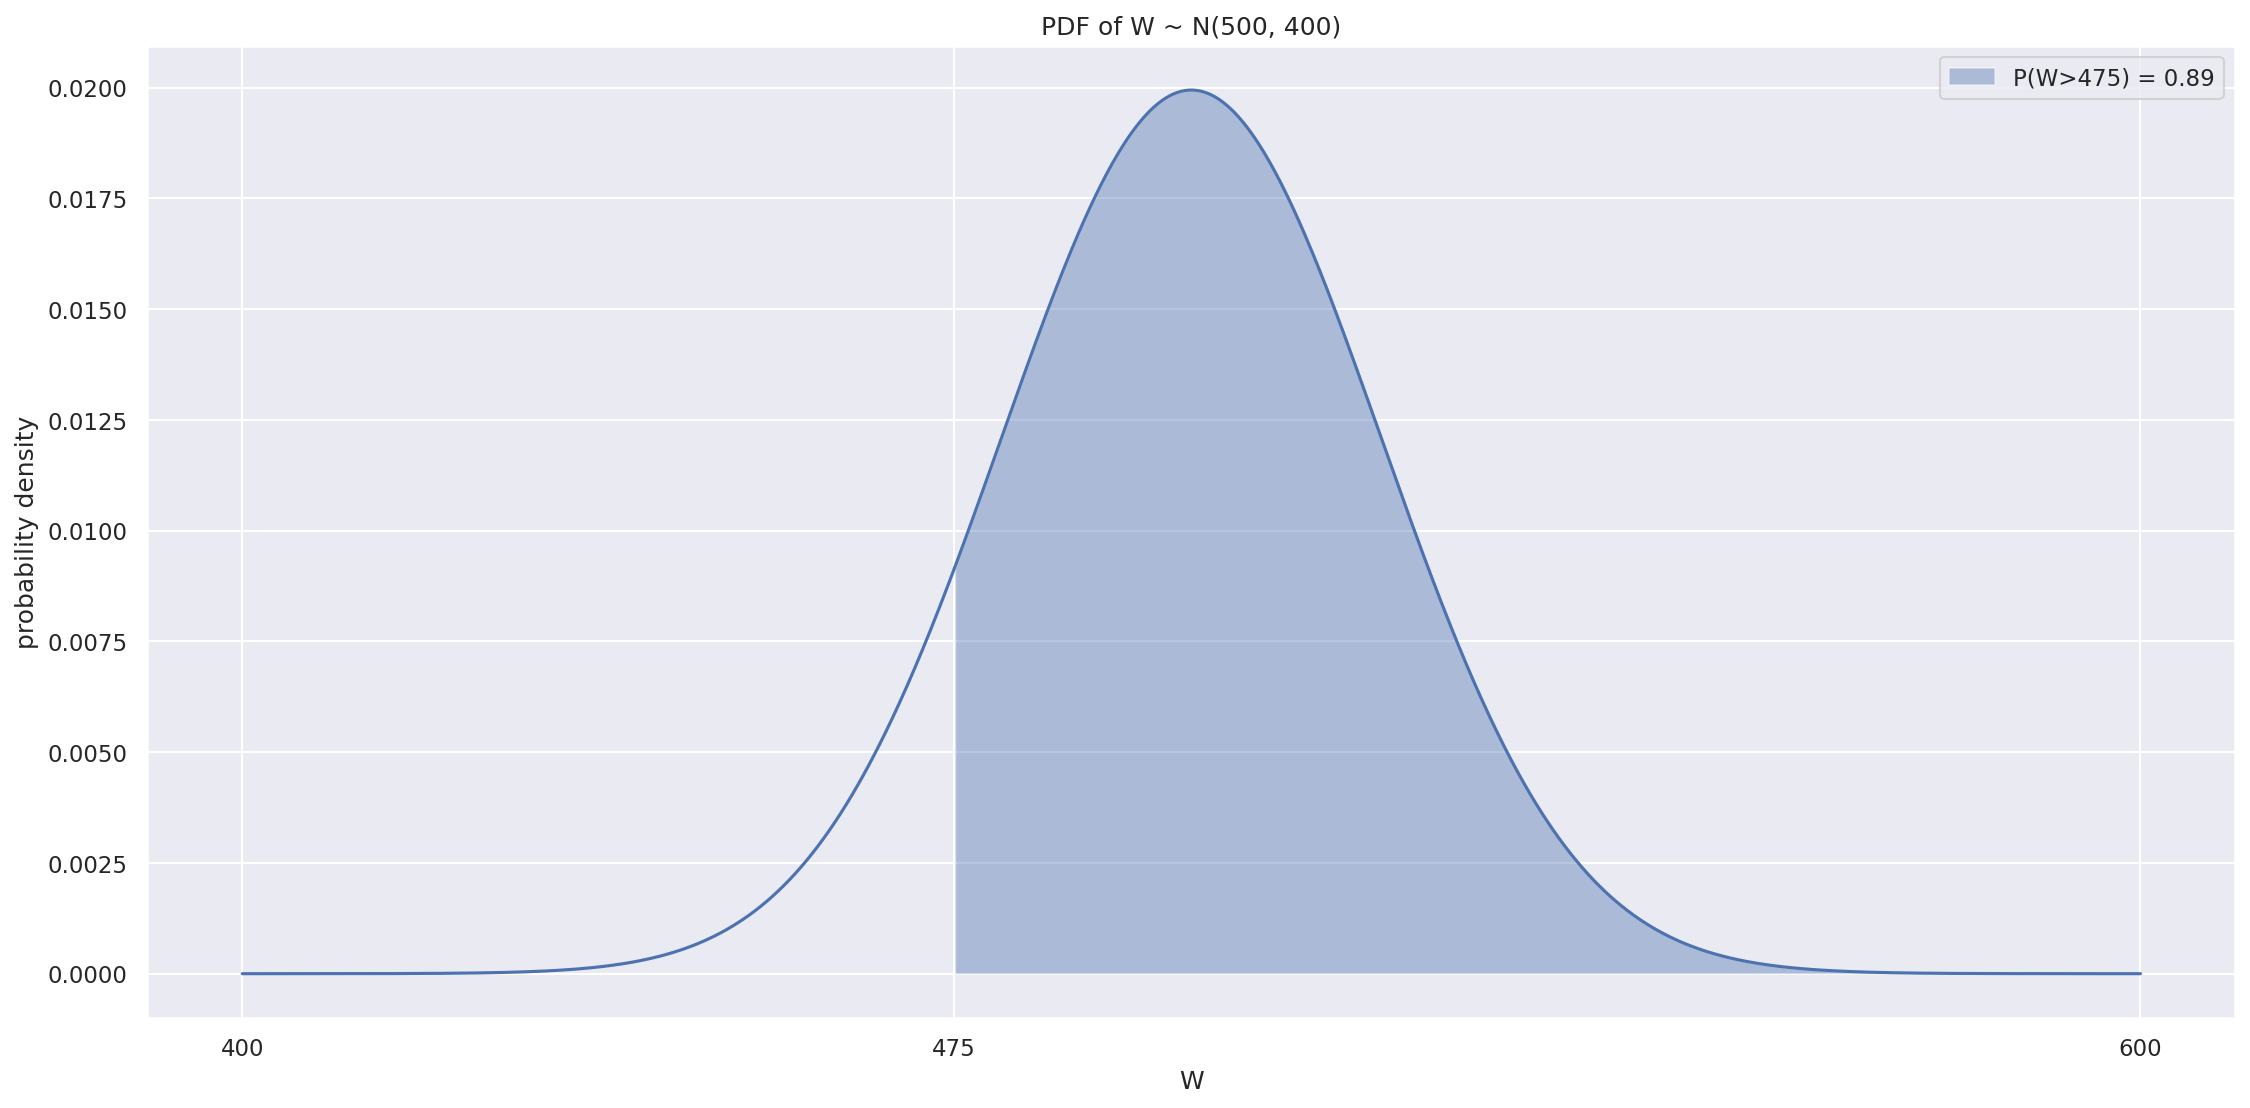

In [296]:
w = np.linspace(400, 600, 1000)

# Plot the PDF 
plt.plot(w, stats.norm.pdf(w,500,20))

# Shade the area that represents the probability we calculated
(
plt.fill_between(w, stats.norm.pdf(w,500,20), 
                 where=[(475<w)  for w in w], 
                 label='P(W>475) = '+str(round(exceed_budget,2)), 
                 alpha=0.4)
)


# Add labels to show where the shaded region starts/ends
labels=[400, 475, 600]
plt.xticks(labels)
plt.legend()
plt.title("PDF of W ~ N(500, 400)")
plt.ylabel("probability density")
plt.xlabel("W")




plt.show()

<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 6c (3 points)

i).  What is the probability the actual costs are between  $\$475$ and $\$515$?   Use an appropriate method from scipy.stats.norm to calculate this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


ii).  Then show graphically what this number means in terms of the PDF (for full credit your output should have the same format and labels as the plot shown directly above). 

In [297]:
q6ci_answer = stats.norm.cdf(515, m, s) - stats.norm.cdf(475, m, s) # P(X < 515) - P(X > 475)

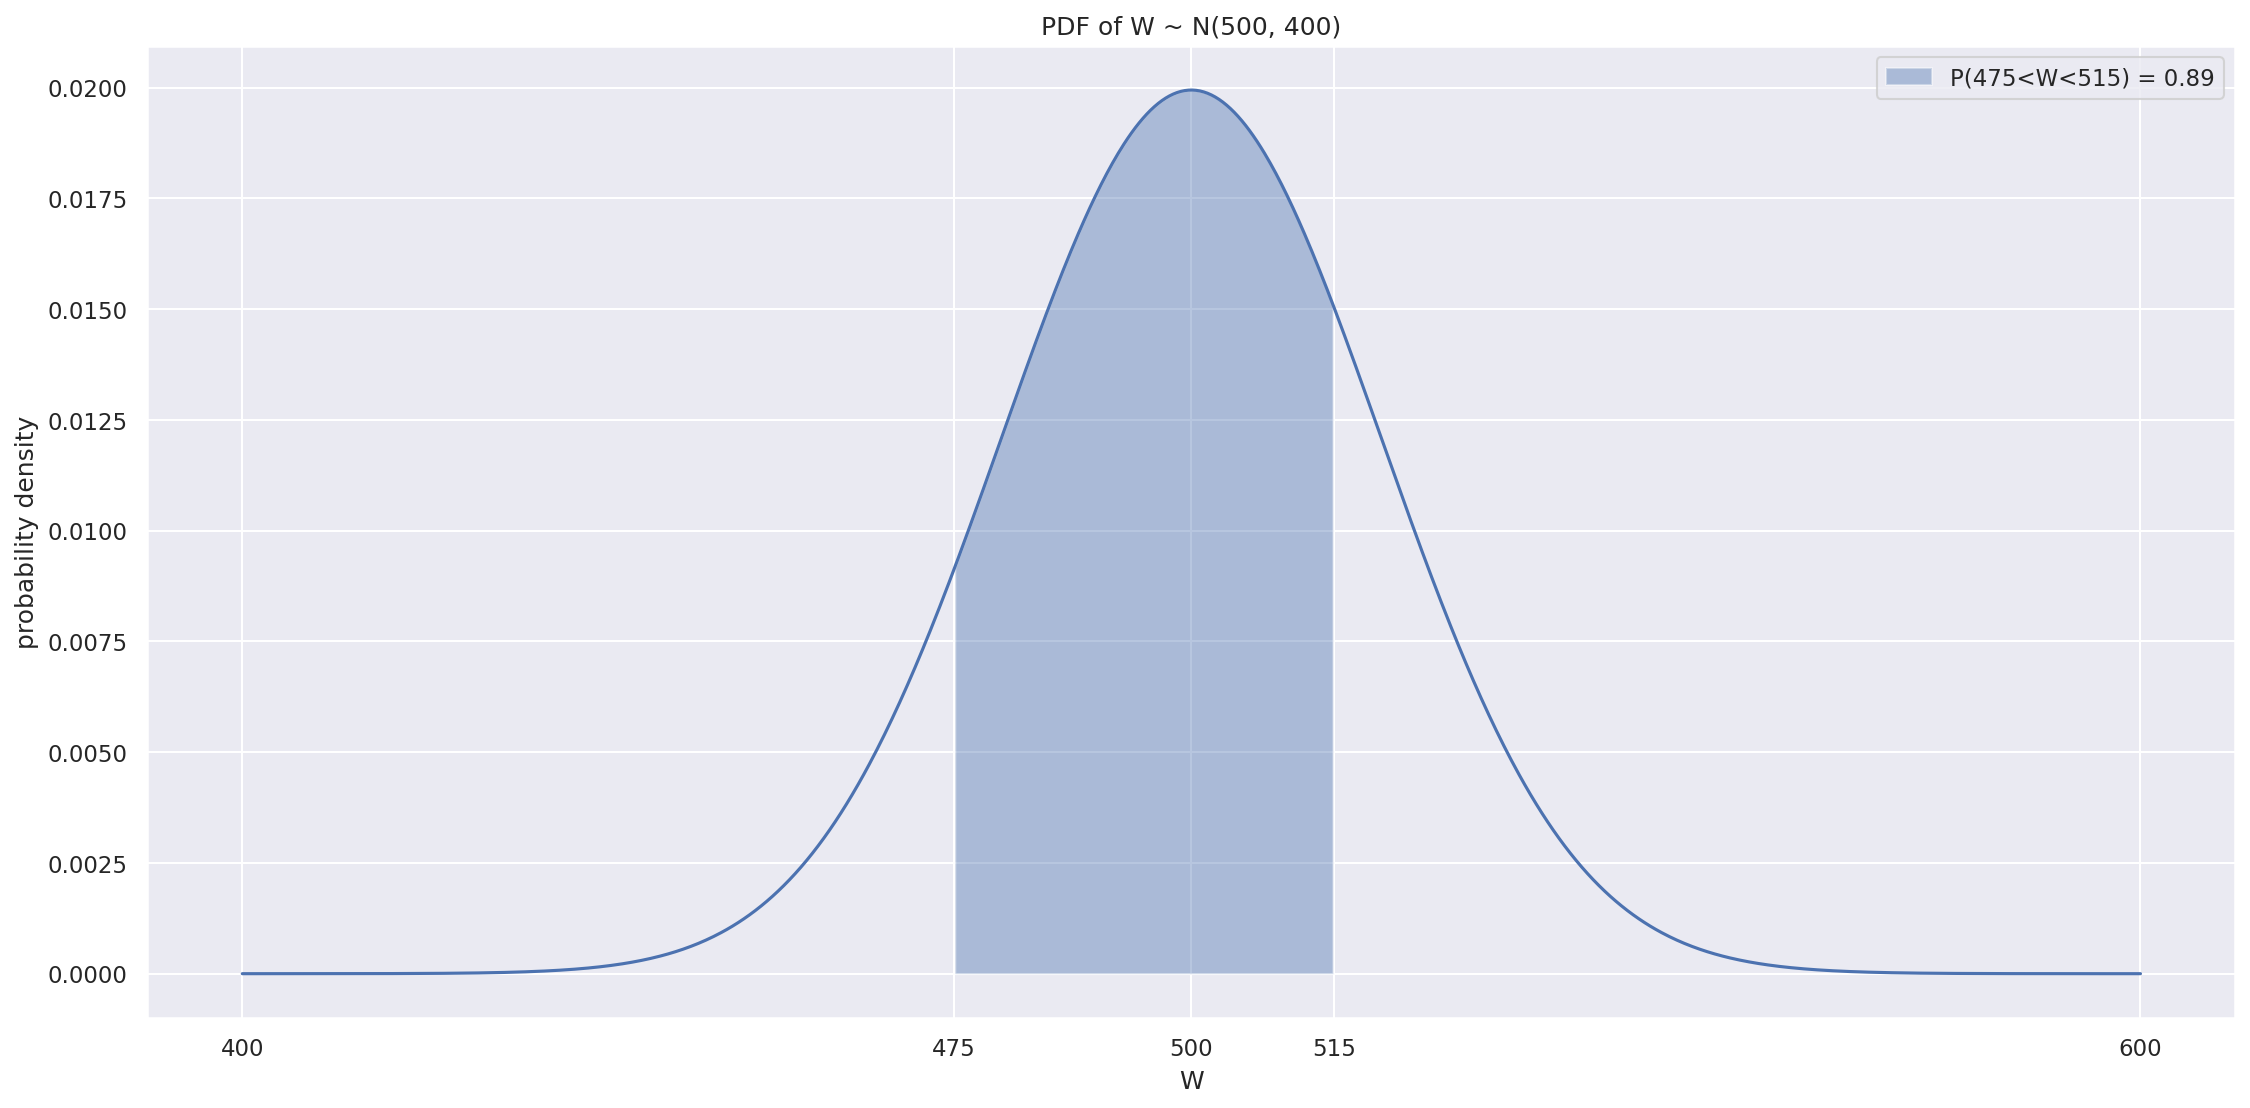

In [298]:
# Code to create graph for 5c(ii)
# DISCLAIMER I JUST USED THE CODE FROM ABOVE; PLEASE DO NOT HATE ME
# I can quote my TA from my class: "Never write your own code when someone else has written it better"

w = np.linspace(400, 600, 1000)

# Plot the PDF 
plt.plot(w, stats.norm.pdf(w,m,s))

# Shade the area that represents the probability we calculated
(
plt.fill_between(w, stats.norm.pdf(w,500,20), 
                 where=[(475<w<515)  for w in w], 
                 label='P(475<W<515) = '+str(round(exceed_budget,2)), 
                 alpha=0.4)
)
    


# Add labels to show where the shaded region starts/ends
labels=[400, 475, 500, 515, 600]
plt.xticks(labels)
plt.legend()
plt.title("PDF of W ~ N(500, 400)")
plt.ylabel("probability density")
plt.xlabel("W")


plt.show()

In [299]:
grader.check("q6c")

q6c results: All test cases passed!

<!-- END QUESTION -->

***

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 6!

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

If you used any websites other than those linked in the assigned reading and/or those posted on Canvas please list those here:

**Outside Websites**:  *list websites referenced here*

### Submission Instructions

Before proceeding any further, **save this notebook.**

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 


* **Homework 6 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW1 Autograded assignment in Gradescope.

* **Homework 6 Manually Graded**: Submit your hw06.PDF to the HW1 Manually Graded assignment in Gradescope.  **It is your responsibility to fully review your PDF file before submitting and make sure that all your lines of code are visible and any LaTeX has correctly compiled and is fully viewable.**  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.** If not, you will lose points.    

**TROUBLESHOOTING TIPS**  If you are having any issues compiling your assignment, please [read through these troubleshooting tips first](https://docs.google.com/document/d/1ndr3Wj1PSF5qzlLMaBJznwh6QGeEXjd5TAJ6nf9EJvo/edit?usp=sharing), then post any questions on Piazza.

If you are noticing an issue with your plots not printing to the PDF here is the fix:  In the toolbar go to Settings.  Then  Disable autosave.  This is enabled by default in JupyterLab. 


**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

In [300]:
nb = slc.Nb_checker()
nb.run_check("hw06.ipynb")

No detected errors. Export can be run.


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='hw06.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [301]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    1b results: All test cases passed!

    1c results: All test cases passed!

    q1e results: All test cases passed!

    q3_check results: All test cases passed!

    q5a_check results: All test cases passed!

    q5b results: All test cases passed!

    q6b results: All test cases passed!

    q6c results: All test cases passed!
